<a href="http://cocl.us/pytorch_link_top">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/Pytochtop.png" width="750" alt="IBM Product " />
</a> 

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/cc-logo-square.png" width="200" alt="cognitiveclass.ai logo" />

<h1>Neural Networks with One Hidden Layer</h1>

<h2>Table of Contents</h2>
<p>In this lab, you will use a single layer neural network to classify handwritten digits from the MNIST database.</p>

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Train">Define the Neural Network, Optimizer, and Train the  Model</a></li>
    <li><a href="#Result">Analyze Results</a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>

<hr>

<h2>Preparation</h2>

We'll need the following libraries

In [1]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

Use the following helper functions for plotting the loss: 

In [2]:
# Define a function to plot accuracy and loss

def plot_accuracy_loss(training_results): 
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()

Use the following function for printing the model parameters: 

In [3]:
# Define a function to plot model parameters

def print_model_parameters(model):
    count = 0
    for ele in model.state_dict():
        count += 1
        if count % 2 != 0:
            print ("The following are the parameters for the layer ", count // 2 + 1)
        if ele.find("bias") != -1:
            print("The size of bias: ", model.state_dict()[ele].size())
        else:
            print("The size of weights: ", model.state_dict()[ele].size())

Define the neural network module or class: 

In [4]:
# Define a function to display data

def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28, 28), cmap='gray')
    plt.show()

<!--Empty Space for separating topics-->

<h2 id="Model">Neural Network Module and Training Function</h2> 

Define the neural network module or class: 

In [5]:
# Define a Neural Network class

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction    
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = self.linear2(x)
        return x

Define a function to train the model. In this case, the function returns a Python dictionary to store the training loss and accuracy on the validation data. 

In [20]:
# Define a training function to train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    # store training loss and validation acc
    useful_stuff = {'training_loss': [],'validation_accuracy': []}  
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader): 
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
             #training loss for every iteration
            print('epoch:'+str(epoch) +'iteration:'+str(i) +'/training_loss',(loss.data.item()))
            useful_stuff['training_loss'].append(loss.data.item())
        correct = 0
        for x, y in validation_loader:
            #validation 
            z = model(x.view(-1, 28 * 28))
            # calculate acc on validation data for each epoch
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        print('validation_accuracy',(accuracy))
        useful_stuff['validation_accuracy'].append(accuracy)
    return useful_stuff

<!--Empty Space for separating topics-->

<h2 id="Makeup_Data">Make Some Data</h2> 

Load the training dataset by setting the parameters <code>train</code> to <code>True</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>.

In [6]:
# Create training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Load the testing dataset by setting the parameters <code>train</code> to <code>False</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>:

In [7]:
# Create validating dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Create the criterion function:  

In [8]:
# Create criterion function

criterion = nn.CrossEntropyLoss()

Create the training-data loader and the validation-data loader objects: 

In [9]:
# Create data loader for both train dataset and valdiate dataset

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

<!--Empty Space for separating topics-->

<h2 id="Train">Define the Neural Network, Optimizer, and Train the Model</h2> 

Create the model with 100 neurons: 

In [10]:
# Create the model with 100 neurons

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

Print the model parameters: 

In [11]:
# Print the parameters for model

print_model_parameters(model)

The following are the parameters for the layer  1
The size of weights:  torch.Size([100, 784])
The size of bias:  torch.Size([100])
The following are the parameters for the layer  2
The size of weights:  torch.Size([10, 100])
The size of bias:  torch.Size([10])


Define the optimizer object with a learning rate of 0.01: 

In [12]:
# Set the learning rate and the optimizer

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Train the model by using 100 epochs **(this process takes time)**: 

In [21]:
# Train the model

training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=10)

epoch:0iteration:0/training_loss 1.8270171880722046
epoch:0iteration:1/training_loss 1.8471355438232422
epoch:0iteration:2/training_loss 1.842639446258545
epoch:0iteration:3/training_loss 1.845165729522705
epoch:0iteration:4/training_loss 1.8320889472961426
epoch:0iteration:5/training_loss 1.8400930166244507
epoch:0iteration:6/training_loss 1.8423783779144287
epoch:0iteration:7/training_loss 1.8300819396972656
epoch:0iteration:8/training_loss 1.84334135055542
epoch:0iteration:9/training_loss 1.839808464050293
epoch:0iteration:10/training_loss 1.8330849409103394
epoch:0iteration:11/training_loss 1.8358572721481323
epoch:0iteration:12/training_loss 1.84005606174469
epoch:0iteration:13/training_loss 1.8482134342193604
epoch:0iteration:14/training_loss 1.8232526779174805
epoch:0iteration:15/training_loss 1.8511877059936523
epoch:0iteration:16/training_loss 1.8301405906677246
epoch:0iteration:17/training_loss 1.8371696472167969
epoch:0iteration:18/training_loss 1.8290772438049316
epoch:0ite

epoch:5iteration:3/training_loss 1.7438600063323975
epoch:5iteration:4/training_loss 1.7424280643463135
epoch:5iteration:5/training_loss 1.751866102218628
epoch:5iteration:6/training_loss 1.7384734153747559
epoch:5iteration:7/training_loss 1.734724760055542
epoch:5iteration:8/training_loss 1.7393516302108765
epoch:5iteration:9/training_loss 1.7305408716201782
epoch:5iteration:10/training_loss 1.7252388000488281
epoch:5iteration:11/training_loss 1.7468973398208618
epoch:5iteration:12/training_loss 1.741872787475586
epoch:5iteration:13/training_loss 1.7471591234207153
epoch:5iteration:14/training_loss 1.7350064516067505
epoch:5iteration:15/training_loss 1.726318120956421
epoch:5iteration:16/training_loss 1.7475025653839111
epoch:5iteration:17/training_loss 1.7441614866256714
epoch:5iteration:18/training_loss 1.7435503005981445
epoch:5iteration:19/training_loss 1.7224048376083374
epoch:5iteration:20/training_loss 1.7393783330917358
epoch:5iteration:21/training_loss 1.7310817241668701
epoc

<!--Empty Space for separating topics-->

<h2 id="Result">Analyze Results</h2> 

Plot the training total loss or cost for every iteration and plot the training accuracy for every epoch:  

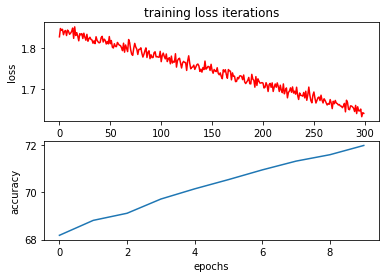

In [22]:
# Plot the accuracy and loss

plot_accuracy_loss(training_results)

Plot the first five misclassified samples:   

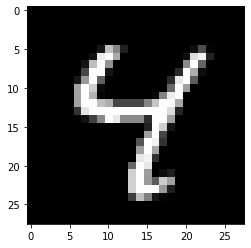

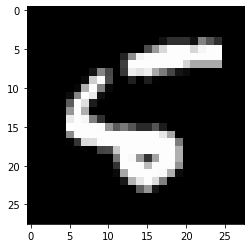

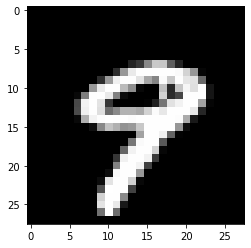

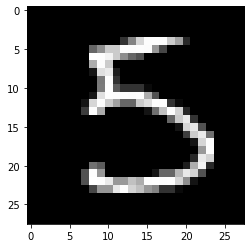

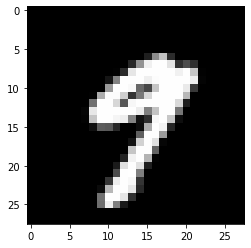

In [23]:
# Plot the first five misclassified samples

count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _,yhat = torch.max(z, 1)
    if yhat != y:
        show_data(x)
        count += 1
    if count >= 5:
        break

<h3>Practice</h3> 

Use <code>nn.Sequential</code> to build exactly the same model as you just built. Use the function <train>train</train> to train the model and use the function <code>plot_accuracy_loss</code> to see the metrics. Also, try different epoch numbers. 

epoch:0iteration:0/training_loss 2.4025180339813232
epoch:0iteration:1/training_loss 2.389235019683838
epoch:0iteration:2/training_loss 2.3832454681396484
epoch:0iteration:3/training_loss 2.3850345611572266
epoch:0iteration:4/training_loss 2.374138116836548
epoch:0iteration:5/training_loss 2.370234489440918
epoch:0iteration:6/training_loss 2.3561925888061523
epoch:0iteration:7/training_loss 2.3689992427825928
epoch:0iteration:8/training_loss 2.3481719493865967
epoch:0iteration:9/training_loss 2.3545055389404297
epoch:0iteration:10/training_loss 2.3618857860565186
epoch:0iteration:11/training_loss 2.335287094116211
epoch:0iteration:12/training_loss 2.3530118465423584
epoch:0iteration:13/training_loss 2.3507633209228516
epoch:0iteration:14/training_loss 2.332343101501465
epoch:0iteration:15/training_loss 2.352407217025757
epoch:0iteration:16/training_loss 2.3403234481811523
epoch:0iteration:17/training_loss 2.3446805477142334
epoch:0iteration:18/training_loss 2.333376407623291
epoch:0ite

epoch:5iteration:4/training_loss 2.257704257965088
epoch:5iteration:5/training_loss 2.2604854106903076
epoch:5iteration:6/training_loss 2.2614121437072754
epoch:5iteration:7/training_loss 2.262599229812622
epoch:5iteration:8/training_loss 2.260605573654175
epoch:5iteration:9/training_loss 2.259894371032715
epoch:5iteration:10/training_loss 2.2567524909973145
epoch:5iteration:11/training_loss 2.2596352100372314
epoch:5iteration:12/training_loss 2.259639263153076
epoch:5iteration:13/training_loss 2.260582685470581
epoch:5iteration:14/training_loss 2.2573490142822266
epoch:5iteration:15/training_loss 2.2564423084259033
epoch:5iteration:16/training_loss 2.2579429149627686
epoch:5iteration:17/training_loss 2.2588512897491455
epoch:5iteration:18/training_loss 2.256795644760132
epoch:5iteration:19/training_loss 2.2569661140441895
epoch:5iteration:20/training_loss 2.2559127807617188
epoch:5iteration:21/training_loss 2.2542197704315186
epoch:5iteration:22/training_loss 2.2577037811279297
epoch:

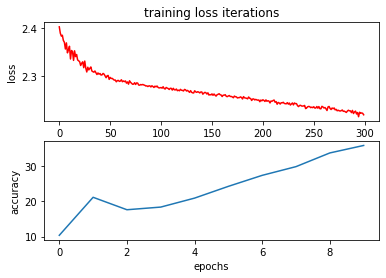

In [24]:
# Practice: Use nn.Sequential to build the same model. Use plot_accuracy_loss to print out the accuarcy and loss

# Type your code here

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hidden_dim),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_dim, output_dim),
)

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs = 10)
plot_accuracy_loss(training_results)

Double-click <b>here</b> for the solution.

<!-- 
input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hidden_dim),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_dim, output_dim),
)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs = 10)
plot_accuracy_loss(training_results)
-->

<!--Empty Space for separating topics-->

<a href="http://cocl.us/pytorch_link_bottom">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/notebook_bottom%20.png" width="750" alt="PyTorch Bottom" />
</a>

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD. 

Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>

<hr>

Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.